In [1]:
import battleship as ship
import genetic_algorithm as ga

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Correct number of pieces on board
0000000000000011100000111110000011000000001100000000110000000101000000010000000000000000000000000000


Text(0.5, 1.0, 'Battleship Board')

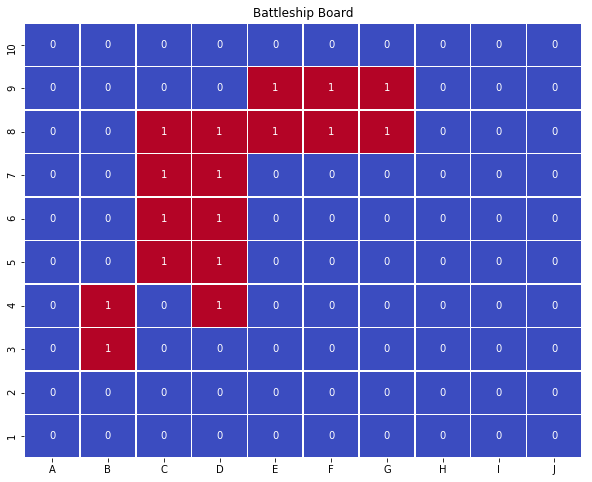

In [2]:
#create a new board and solution
board, solution = ship.new_board()

# print the genetic solution
print(solution)

# add the board to a dataframe for plotting
df = pd.DataFrame(board, columns=['A','B','C','D','E','F','G','H','I','J',])
df['ylabel'] = range(10,0,-1)
df = df.set_index('ylabel')

# print the board using a heatmap
fig, ax = plt.subplots(1, 1, figsize = (10, 8))
sns.heatmap(df, cmap='coolwarm', linewidths=0.5, annot=True, fmt='d', cbar=False)
ax.set_ylabel('')    
ax.set_xlabel('')
ax.set_title('Battleship Board')

In [11]:
# initialize the first random generation
generation_size = 10
gene_pool = ga.random_generation(generation_size, 100)

# compare fitness
gene_pool['Fitness'] = gene_pool.apply(lambda row: ship.accuracy(row.Chromosome, solution), axis=1)

# assign elites with elite rate
elite_rate = 0.20
gene_pool = ga.assign_elites(gene_pool, elite_rate)
next_generation = gene_pool
gene_pool

,Sequence,Chromosome,Generation,Birth,Fitness,Parents,Elite
8,9,1010111000100011111001010110101100100110000110...,1,Random,0.63,0,True
1,2,1101110100111101101100111101100101000011101110...,1,Random,0.56,0,True
3,4,0011110111100110101110100111010000000101111100...,1,Random,0.53,0,False
6,7,0011111110000010001000110010010011111111101110...,1,Random,0.52,0,False
9,10,1101010001001101001100110100001101100101111010...,1,Random,0.52,0,False
0,1,0101001111010001100111011010000110001011101111...,1,Random,0.50,0,False
2,3,1101101000011010000111010110101100101011011000...,1,Random,0.48,0,False
7,8,0011000100000001000011101101101010111011100011...,1,Random,0.46,0,False
4,5,1101011111100111110100111001111100101111110101...,1,Random,0.43,0,False
5,6,1011100110011101110110001011101010110111100100...,1,Random,0.43,0,False


In [ ]:
gene_pool.describe()

In [42]:
# select elites with elite rate
next_generation = ga.select_elites(next_generation)

# add splice pairs to generation
splice_pair_rate = elite_rate / 2
n_splice_pairs = int(splice_pair_rate * generation_size)
next_generation = ga.create_splices(next_generation, n_splice_pairs)

# add mutants to generation
mutant_rate = 0.40
bit_flip_rate = 0.05
n_mutants = int(mutant_rate * generation_size)
next_generation = ga.create_mutants(next_generation, n_mutants, bit_flip_rate)

# fill the rest of the generation with random chromosomes for diversity
next_generation = ga.fill_random(next_generation, generation_size, 100)

# compare fitness
next_generation['Fitness'] = next_generation.apply(lambda row: ship.accuracy(row.Chromosome, solution), axis=1)

# assign elites with elite rate
elite_rate = 0.20
next_generation = ga.assign_elites(next_generation, elite_rate)
next_generation

,Sequence,Chromosome,Generation,Birth,Fitness,Parents,Elite
0,266,1010100000100011100000011110101101000110001110...,17,Elitism,0.78,249,True
1,267,1010100000100011100000011110101101000110001110...,17,Elitism,0.78,250,True
2,268,1010100000100011100000011110101101000110001110...,17,Splice Pair,0.78,"[267, 266]",False
3,268,1010100000100011100000011110101101000110001110...,17,Splice Pair,0.78,"[267, 266]",False
4,269,1010100001100011100000111110101101100110001110...,17,Mutation,0.76,266,False
5,270,1010100000000011100000111110111001000110011110...,17,Mutation,0.76,266,False
7,272,1010100000100011100000011110101101010111001110...,17,Mutation,0.75,267,False
6,271,1010100000100011100000011110111101000110111110...,17,Mutation,0.74,266,False
9,282,0010110100101101100110001001100011011111111010...,17,Random,0.50,0,False
8,281,0001111000000110110010101001110110111111100101...,17,Random,0.46,0,False


In [41]:
gene_pool = gene_pool.append(next_generation)
gene_pool

,Sequence,Chromosome,Generation,Birth,Fitness,Parents,Elite
8,9,1010111000100011111001010110101100100110000110...,1,Random,0.63,0,True
1,2,1101110100111101101100111101100101000011101110...,1,Random,0.56,0,True
3,4,0011110111100110101110100111010000000101111100...,1,Random,0.53,0,False
6,7,0011111110000010001000110010010011111111101110...,1,Random,0.52,0,False
9,10,1101010001001101001100110100001101100101111010...,1,Random,0.52,0,False
0,1,0101001111010001100111011010000110001011101111...,1,Random,0.50,0,False
2,3,1101101000011010000111010110101100101011011000...,1,Random,0.48,0,False
7,8,0011000100000001000011101101101010111011100011...,1,Random,0.46,0,False
4,5,1101011111100111110100111001111100101111110101...,1,Random,0.43,0,False
5,6,1011100110011101110110001011101010110111100100...,1,Random,0.43,0,False
